In [1]:
:extension OverloadedStrings
:load QNKAT/Definitions.hs
:load QNKAT/Drawing.hs

[Documentation](../view/dist-newstyle/build/x86_64-linux/ghc-9.0.2/qnkat-playground-0.0.0/doc/html/qnkat-playground/index.html)

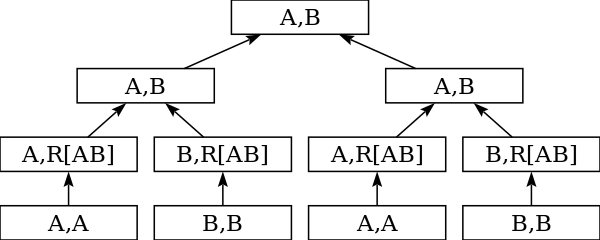

In [2]:
p = (Create "A" <||> Create "B") <> (Transmit "A" ("A", "R[AB]") <||> Transmit "B" ("B", "R[AB]")) <> Swap "R[AB]" ("A", "B")
    
drawPolicy $ (p <||> p) <> Distill ("A", "B")

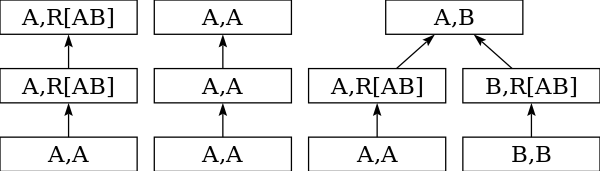

In [3]:
drawPolicy $ (Create "A" <||> Create "A" <||> Create "A" <||> Create "B") <> (Transmit "A" ("A", "R[AB]") <||>Transmit "A" ("A", "R[AB]") <||> Transmit "B" ("B", "R[AB]")) <> Swap "R[AB]" ("A", "B")

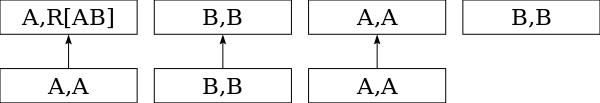

In [4]:
drawPolicy $ 
    (Create "A" <> Transmit "A" ("A", "R[AB]")) 
    <||> (Create "B" <> Transmit "A" ("A", "R[AB]")) 
    <||> (Create "A" <> Transmit "B" ("B", "R[AB]"))
    <||> Create "B" 

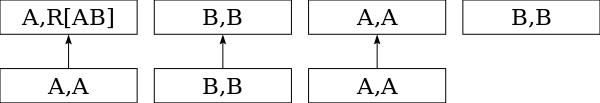

In [5]:
drawPolicy $ 
    Create "A" <> Transmit "A" ("A", "R[AB]")
    <||> Create "B" <> Transmit "A" ("A", "R[AB]") 
    <||> (Create "A" <> Transmit "B" ("B", "R[AB]")) {- where is this A,A? -}
    <||> Create "B" 

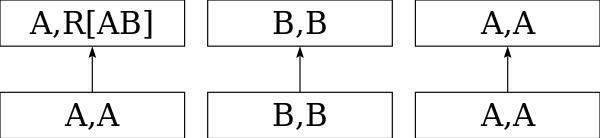

In [6]:
drawPolicy $ 
    Create "A" <> Transmit "A" ("A", "R[AB]")
    <||> Create "B" <> Transmit "A" ("A", "R[AB]") 
    <||> (Create "A" <> Transmit "B" ("B", "R[AB]"))  {- here is A,A as expected, above it vanishes -}
   

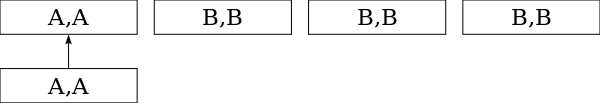

In [7]:
drawPolicy $  Create "A" <> Transmit "B" ("B", "R[AB]") <||> Create "B" <||> Create "B" <||> Create "B" 
{- something to do with the lack of () -}

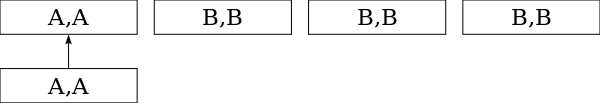

In [8]:
drawPolicy $  (Create "A" <> Transmit "B" ("B", "R[AB]")) <||> Create "B" <||> Create "B" <||> Create "B" 

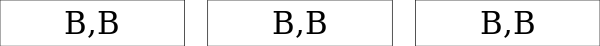

In [9]:
drawPolicy $   Create "B" <||> Create "B" <||> Create "B" <||> Transmit "B" ("B", "R[AB]") 

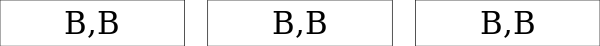

In [10]:
drawPolicy $ Transmit "B" ("B", "R[AB]") <||> (Create "B" <||> Create "B" <||> Create "B")

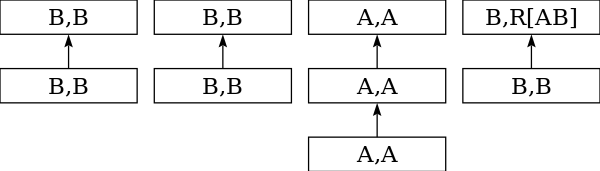

In [11]:
drawPolicy $  ((Create "A" <> Transmit "B" ("B", "R[AB]")) <||> Create "B" <||> Create "B" <||> Create "B" ) <>Transmit "B" ("B", "R[AB]") <||> Transmit "A" ("A", "R[AB]")

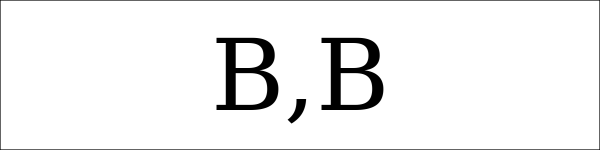

In [12]:
drawPolicy $ (Transmit "B" ("B", "R[AB]") <||> Create "B"  <> Transmit "B" ("B", "R[AB]") ) <||> Create "B"

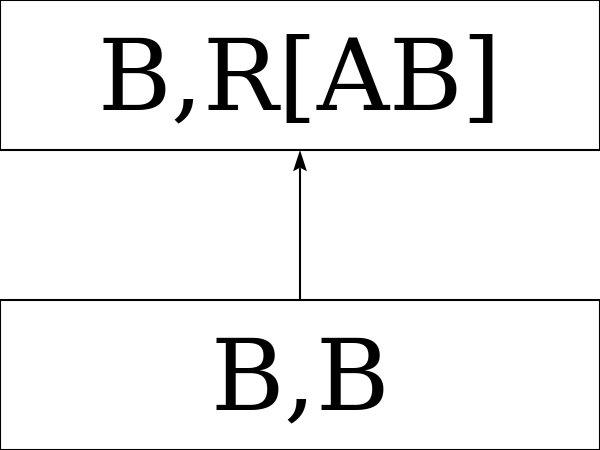

In [13]:
drawPolicy $ Transmit "B" ("B", "R[AB]") <||> Create "B"  <> Transmit "B" ("B", "R[AB]") 

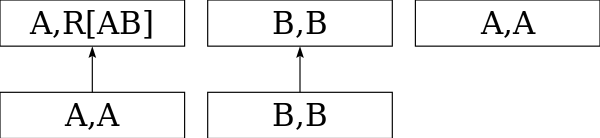

In [14]:
drawPolicy $ 
    Create "A" <> Transmit "A" ("A", "R[AB]")
    <||> Create "B" <> Transmit "A" ("A", "R[AB]") <||> Create "A" 
   

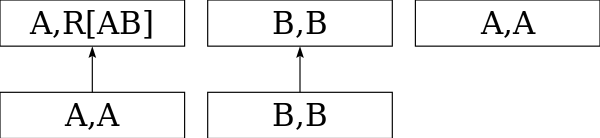

In [15]:
drawPolicy $ 
     Create "A" <> Transmit "A" ("A", "R[AB]")
    <||> ( Create "B" <> Transmit "A" ("A", "R[AB]")  <||> Create "A" )
   

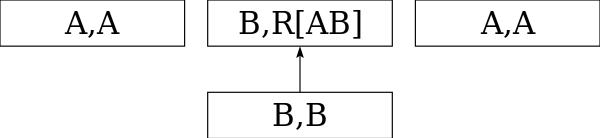

In [16]:
drawPolicy $ 
     Create "A" 
    <||>  ( Create "B" <> Transmit "B" ("B", "R[AB]")  <||> Create "A"  )
   

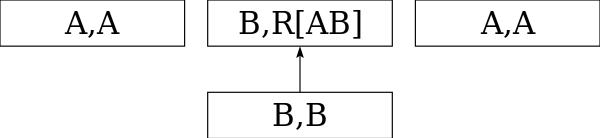

In [17]:
drawPolicy $ 
     Create "A" 
    <||>  Create "B" <> Transmit "B" ("B", "R[AB]")  <||> Create "A" 
   

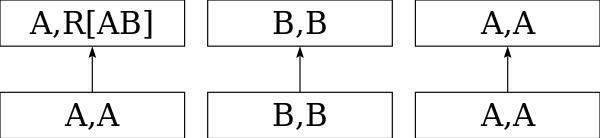

In [18]:
drawPolicy $ 
    Create "A" <> Transmit "A" ("A", "R[AB]")
    <||> Create "B" <> Transmit "A" ("A", "R[AB]") <||> Create "A" <> Transmit "B" ("B", "R[AB]")
   

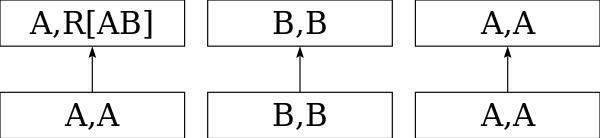

In [19]:
drawPolicy $ 
    Create "A" <> Transmit "A" ("A", "R[AB]")
    <||> Create "B" <> Transmit "A" ("A", "R[AB]") <||> (Create "A" <> Transmit "B" ("B", "R[AB]")) 
    {- why is here create A on the same level as create B? -}
   

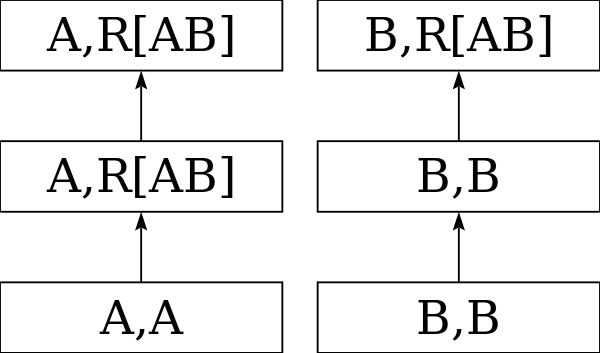

In [20]:
drawPolicy $ 
    (Create "A" <||> Create "B") <> Transmit "A" ("A", "R[AB]") <> Transmit "B" ("B", "R[AB]")

Line 5: Redundant bracket
Found:
(Transmit "B" ("B", "R[AB]") <||> Create "B")
  <> (Swap "R[AB]" ("A", "B"))
Why not:
(Transmit "B" ("B", "R[AB]") <||> Create "B")
  <> Swap "R[AB]" ("A", "B")

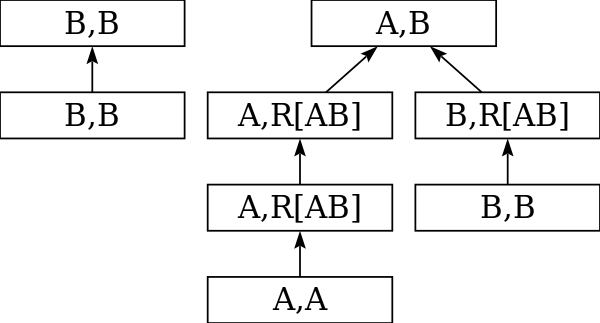

In [21]:
drawPolicy $ 
    Create "A"
    <> (Transmit "A" ("A", "R[AB]") <||> Create "B") 
    <> (Transmit "B" ("B", "R[AB]") {- <||> Identity ("A", "R[AB]") -} <||> Create "B")
    <> (Swap "R[AB]" ("A", "B") {- <||> Identity ("B", "B") -})

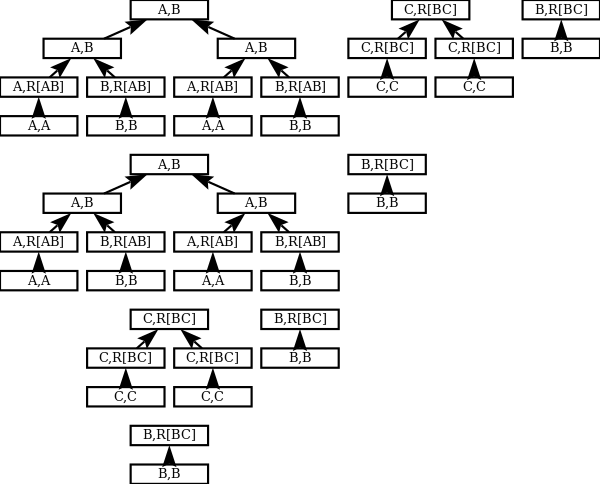

In [22]:
pAB = (Create "A" <||> Create "B") <> (Transmit "A" ("A", "R[AB]") <||> Transmit "B" ("B", "R[AB]")) <> Swap "R[AB]" ("A", "B")
pCR = ((Create "C" <> Transmit "C" ("C", "R[BC]")) <||> (Create "C" <> Transmit "C" ("C", "R[BC]"))) <> Distill ("C", "R[BC]")

drawPolicy $ ((pAB <||> pAB) <> Distill ("A", "B")) <||> (pCR <||> (Create "B" <> Transmit "B" ("B", "R[BC]")) )

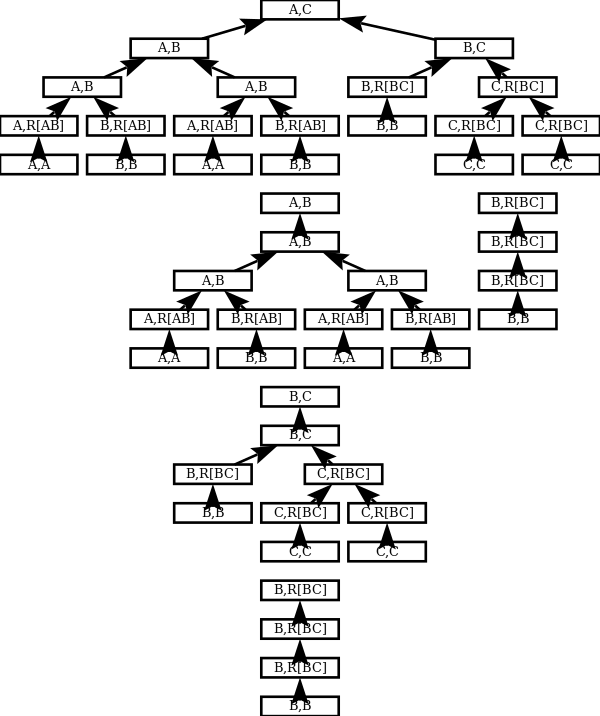

In [23]:
pAB = (Create "A" <||> Create "B") <> (Transmit "A" ("A", "R[AB]") <||> Transmit "B" ("B", "R[AB]")) <> Swap "R[AB]" ("A", "B")
pCR = ((Create "C" <> Transmit "C" ("C", "R[BC]")) <||> (Create "C" <> Transmit "C" ("C", "R[BC]"))) <> Distill ("C", "R[BC]")
pBC = (pCR <||> (Create "B" <> Transmit "B" ("B", "R[BC]"))) <> Swap "R[BC]" ("B", "C")


drawPolicy $ (((pAB <||> pAB) <> Distill ("A", "B")) <||> pBC ) <> Swap "B" ("A", "C")

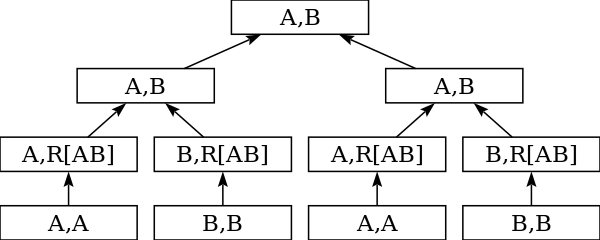

In [24]:
pAB = (Create "A" <||> Create "B") <> (Transmit "A" ("A", "R[AB]") <||> Transmit "B" ("B", "R[AB]")) <> Swap "R[AB]" ("A", "B")
pCR = ((Create "C" <> Transmit "C" ("C", "R[BC]")) <||> (Create "C" <> Transmit "C" ("C", "R[BC]"))) <> Distill ("C", "R[BC]")
pBC = (pCR <||> (Create "B" <> Transmit "B" ("B", "R[BC]"))) <> Swap "R[BC]" ("B", "C")

drawPolicy ((pAB <||> pAB) <> Distill ("A", "B"))

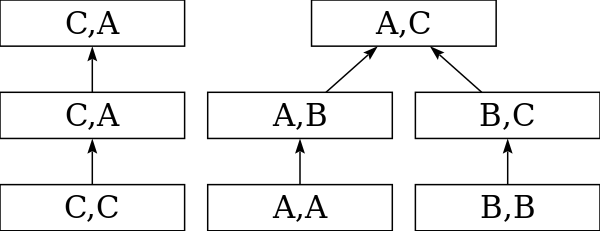

In [25]:
drawPolicy $ (Create "A" <||> Create "B" <||> Create "C") <> (Transmit "A" ("A", "B") <||> Transmit "B" ("B", "C") <||> Transmit "C" ("C", "A")) <> Swap "B" ("A", "C")

## Question

 * Show failures as part of the history? Could be too much of information?
 * Failures in distill and swap?
 * reachability in practice (only with some probability)
 * Simulating the actual run of the policy?
 * Generate the policy from probability

## Checking some properties

In [26]:
import Test.QuickCheck

In [27]:
(~) :: Policy -> Policy -> History -> Bool
(~) p q h = applyPolicy p h == applyPolicy q h
sequentialCompositionIsAssociative p q s = ((p <> q) <> s) ~ (p <> (q <> s))
parallelCompositionIsAssociative p q s = ((p <||> q) <||> s) ~ (p <||> (q <||> s)) 
sequentialCompositionDistributes p q s = ((p <||> q) <> s) ~ ((p <> s) <||> (q <> s))

In [28]:
qnkatQuickCheck = quickCheckWith (stdArgs { maxSize = 4, maxSuccess = 10000 })

In [29]:
qnkatQuickCheck sequentialCompositionIsAssociative
qnkatQuickCheck parallelCompositionIsAssociative
qnkatQuickCheck sequentialCompositionDistributes

+++ OK, passed 10000 tests.

*** Failed! Falsified (after 1 test):
Transmit "C" ("D","E")
Create "E"
Create "E"
[]

*** Failed! Falsified (after 3 tests and 7 shrinks):
Transmit "B" ("B","B")
Swap "D" ("C","C")
Swap "A" ("C","C")
[Node {rootLabel = C,F, subForest = []}]